## Observations and Insights 

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = mouse_metadata.merge(study_results, how='outer', on='Mouse ID')
# Display the data table for preview
master_df = pd.DataFrame(merged_data)
master_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
#Analysis: One of the most notable and prominent things associated with the linear regression ran in this
#assignment is how it tells you absolutely nothing. Is it strongly correlated? Yes. But to make the statement that as mass
#increases then mass increases is not very meaningful.
# that there was only one outlier is actually quite promising for analysis and not very common.
#one of the more striking things to note was how the tumor volume dropped so thoroughly dropped with treatment.
#personally I think looking at the relationship between tumor volume and treatments is more meaningful.

In [22]:
# Checking the number of mice.
len(master_df['Mouse ID'].value_counts())

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duped_list = master_df[master_df.duplicated(['Mouse ID', "Timepoint"])]
duped_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [24]:
# Optional: Get all the data for the duplicate mouse ID. 


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = master_df.loc[master_df['Mouse ID'] != 'g989']
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [26]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumors_df = pd.DataFrame()
drug_group = clean_data_df.groupby(['Drug Regimen'])
tumors_df['mean'] = drug_group['Tumor Volume (mm3)'].mean()
tumors_df['median']= drug_group['Tumor Volume (mm3)'].median()
tumors_df['variance'] = drug_group['Tumor Volume (mm3)'].var()
tumors_df['standard_deviation'] = drug_group['Tumor Volume (mm3)'].std()
tumors_df['SEM'] = drug_group['Tumor Volume (mm3)'].sem()
tumors_df

,mean,median,variance,standard_deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_group = drug_group['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
agg_drug_group

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

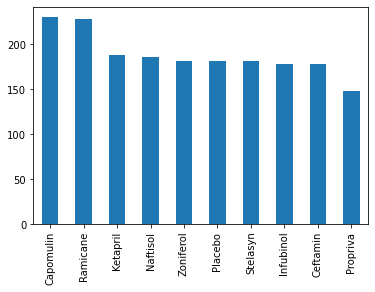

In [30]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
sub = clean_data_df['Drug Regimen'].value_counts()
sub.plot(kind='bar')
plt.show()

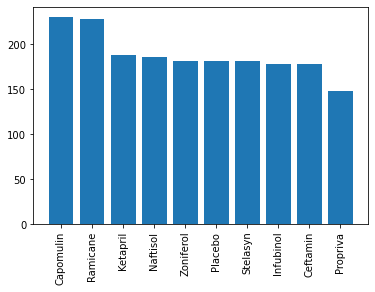

In [31]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(sub.index,sub)
plt.xticks(rotation=90)
plt.show()

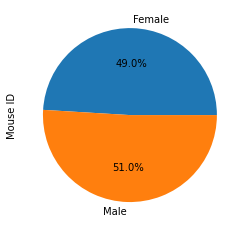

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_data_df.groupby(['Sex'])

gender_group['Mouse ID'].count().plot(kind='pie', y='Sex',subplots=True, autopct='%1.1f%%')
plt.show()

125
123


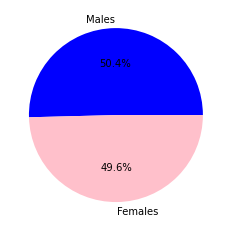

In [161]:
gender5 = clean_data_df.groupby(['Mouse ID'])

sex_distribution = pd.DataFrame()

sex_distribution["Sex"] = gender5['Sex'].unique()

(Male, Female) = sex_distribution['Sex'].value_counts()

print(Male)
print(Female)
labels = ['Males','Females']
sizes = Male, Female
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['blue','pink'])
plt.show()


## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
four_drugs = clean_data_df[(clean_data_df['Drug Regimen'] == 'Capomulin')|(clean_data_df['Drug Regimen'] == 'Ramicane')|(clean_data_df['Drug Regimen'] == 'Infubinol')|(clean_data_df['Drug Regimen'] == 'Ceftamin')]
time_df = pd.DataFrame()
mouse_group = four_drugs.groupby(['Mouse ID'])
time_df['last_timepoint'] = mouse_group['Timepoint'].max()
time_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = time_df.merge(clean_data_df,how='left',on='Mouse ID')
final_merged_df = merged_df[['Mouse ID','Tumor Volume (mm3)','Drug Regimen','Timepoint']].loc[merged_df['last_timepoint'] == merged_df['Timepoint']]
final_merged_df

,Mouse ID,Tumor Volume (mm3),Drug Regimen,Timepoint
9,a203,67.973419,Infubinol,45
19,a251,65.525743,Infubinol,45
29,a275,62.999356,Ceftamin,45
39,a411,38.407618,Ramicane,45
49,a444,43.047543,Ramicane,45
...,...,...,...,...
773,y769,68.594745,Ceftamin,45
783,y793,31.896238,Capomulin,45
793,y865,64.729837,Ceftamin,45
803,z578,30.638696,Ramicane,45


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []
#Capomulin, Ramicane, Infubinol, and Ceftamin

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatments:
#    if final_merged_df['Drug Regimen'] == drug:
        
    
    
for drug in treatments:
    drug_loop_df =final_merged_df['Tumor Volume (mm3)'].loc[final_merged_df['Drug Regimen'] == drug]
    tumor_data.append(drug_loop_df)
    quartiles = drug_loop_df.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    upperoutl = 1.5*iqr + upperq
    loweroutl = lowerq - 1.5*iqr
    
    for x in drug_loop_df:
        if x > upperoutl or x < loweroutl :
            print(f'{drug} {x}')


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Infubinol 36.321345799999996


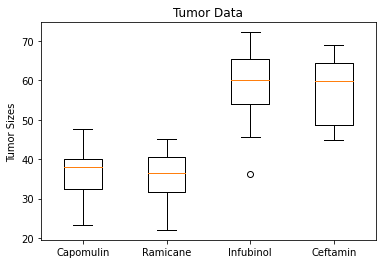

In [118]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.title('Tumor Data')
plt.ylabel('Tumor Sizes')
plt.boxplot(tumor_data)
plt.xticks([1, 2, 3,4], treatments)
plt.show()

## Line and Scatter Plots

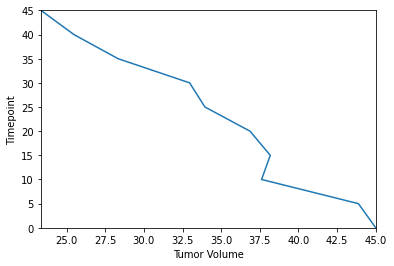

In [114]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
the_chosen_one = clean_data_df[(clean_data_df['Drug Regimen'] == 'Capomulin')]['Mouse ID'].iloc[0]
cap_drug = clean_data_df.loc[clean_data_df['Mouse ID'] == the_chosen_one]

x_axis = cap_drug['Tumor Volume (mm3)']
y_axis = cap_drug['Timepoint']
plt.plot(x_axis,y_axis)
plt.xlabel('Tumor Volume')
plt.ylabel('Timepoint')
plt.xlim(x_axis.min(),x_axis.max())
plt.ylim(y_axis.min(),y_axis.max())
plt.show()




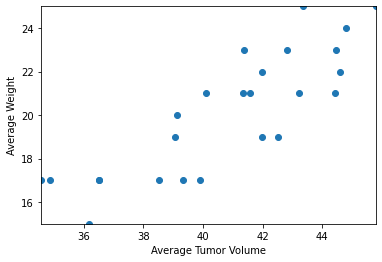

In [116]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_avgs = clean_data_df[(clean_data_df['Drug Regimen'] == 'Capomulin')]
mice_group2 = cap_avgs.groupby(['Mouse ID'])
x_axis2 = mice_group2['Tumor Volume (mm3)'].mean()
y_axis2 = mice_group2['Weight (g)'].mean()
plt.scatter(x_axis2,y_axis2)
plt.xlabel('Average Tumor Volume')
plt.ylabel('Average Weight')
plt.xlim(x_axis2.min(),x_axis2.max())
plt.ylim(y_axis2.min(),y_axis2.max())
plt.show()

## Correlation and Regression

The correlation between both factors is 0.84
The linear regression equation is y = 0.74x + -10.15


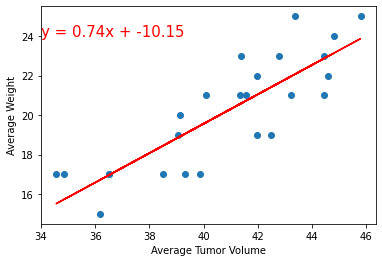

In [122]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis2,y_axis2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2,y_axis2)
plt.plot(x_axis2,regress_values,"r-")
plt.annotate(line_eq,(34,24),fontsize=15,color="red")
plt.xlabel('Average Tumor Volume')
plt.ylabel('Average Weight')
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f'The linear regression equation is {line_eq}')
plt.show()